/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>BinaryGibbsMetropolis: [which_coin]
>NUTS: [theta_biased]


Sampling 2 chains for 2_500 tune and 5_000 draw iterations (5_000 + 10_000 draws total) took 26 seconds.
<ipython-input-5-204d21c62bb6>:11: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(coin_trace);
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


p(coin=fair|HH)=0.426


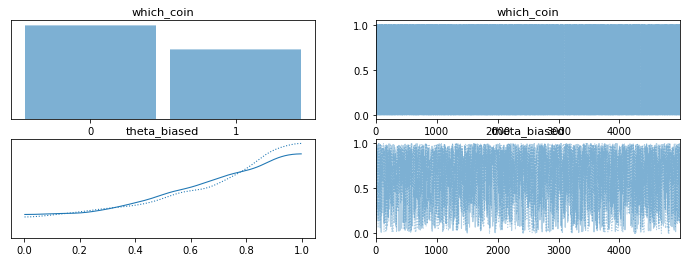

In [5]:
import pymc3 as pm

with pm.Model() as coinflip:
    which_coin = pm.Bernoulli('which_coin', 0.5)
    theta_biased = pm.Uniform('theta_biased', 0, 1)
    p = pm.math.switch(which_coin > 0.5, 0.5, theta_biased)
    heads = pm.Binomial('heads', n=2, p=p, observed=2)
    
    coin_trace = pm.sample(5000, tune=2500)

pm.traceplot(coin_trace);

print('p(coin=fair|HH)={}'.format(
    coin_trace['which_coin'].mean()
))